#### Employee attrition is an issue that has been puzzling the Human Resource Managers of various companies for a long time. In this project, we will predict wheather a employee's attriction is positive or negative.The dataset that is published by the Human Resource department of IBM.
###### Dataset:https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing the dataset
dataset=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
dataset.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# visualising the dataset

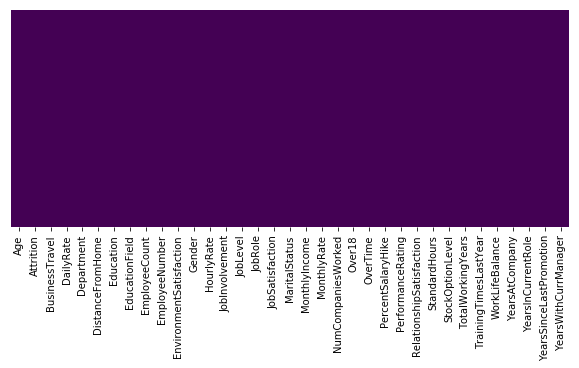

In [4]:
#heatmap to check the missing value
plt.figure(figsize=(10,4))
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

###### so,we can see here is no missing data in the dataset 

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [6]:
dataset.shape

(1470, 35)

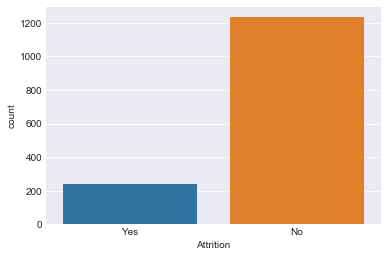

In [7]:
sns.set_style('darkgrid')
sns.countplot(x='Attrition',data=dataset)

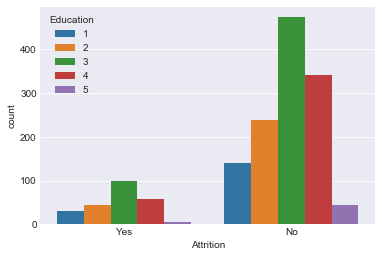

In [8]:
sns.countplot(x='Attrition',hue='Education',data=dataset)

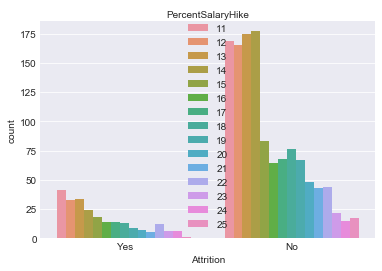

In [9]:
sns.countplot(x='Attrition',hue='PercentSalaryHike',data=dataset,)

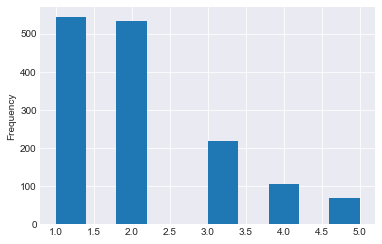

In [10]:
#checking the joblevel 
dataset['JobLevel'].plot.hist()

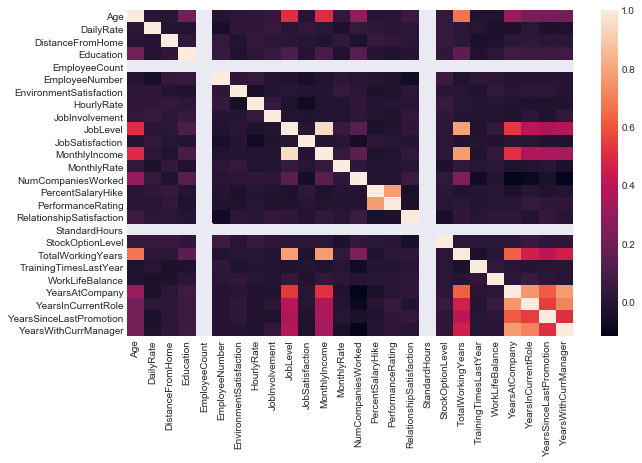

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr())

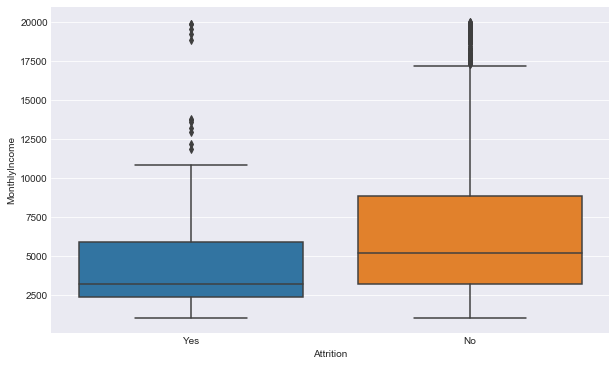

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(y='MonthlyIncome',x='Attrition',data=dataset)

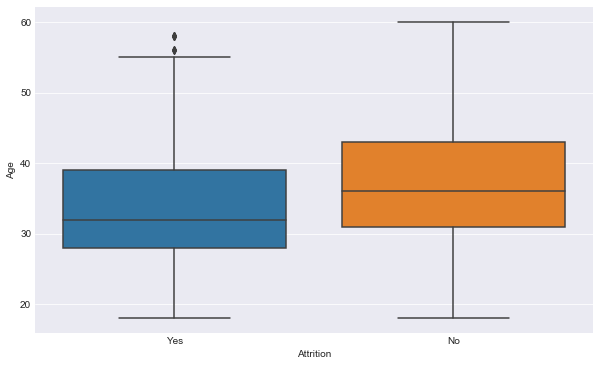

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(y='Age',x='Attrition',data=dataset)

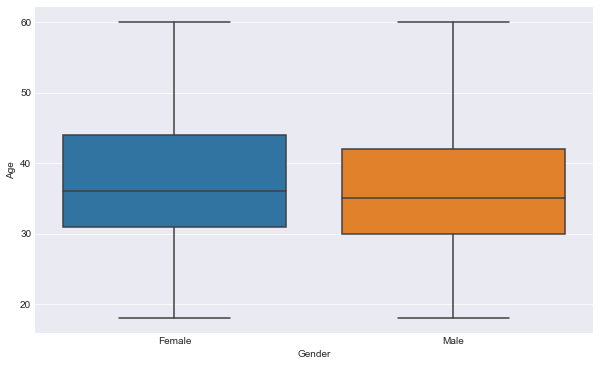

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(y='Age',x='Gender',data=dataset)

In [15]:
#deleting the irrelevant columns
#4 irelevent columns,i.e:EmployeeCount,EmployeeNumber,Over18,StandardHour

In [16]:
dataset.drop('EmployeeCount',axis=1,inplace=True)
dataset.drop('StandardHours',axis=1,inplace=True)
dataset.drop('EmployeeNumber',axis=1,inplace=True)
dataset.drop('Over18',axis=1,inplace=True)

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked    

In [18]:
#so,now we have deleted irrelevent columns
dataset.shape


(1470, 31)

In [19]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [20]:
#ind_Attririon = pd.get_dummies(dataset['Attririon'],drop_first=True)
y=dataset.iloc[:,1]
x=dataset
x.drop('Attrition',axis=1,inplace=True)

In [21]:
type(x)

pandas.core.frame.DataFrame

In [22]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
y=lb.fit_transform(y)

In [23]:
dataset.select_dtypes(['object'])

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
5,Travel_Frequently,Research & Development,Life Sciences,Male,Laboratory Technician,Single,No
6,Travel_Rarely,Research & Development,Medical,Female,Laboratory Technician,Married,Yes
7,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Divorced,No
8,Travel_Frequently,Research & Development,Life Sciences,Male,Manufacturing Director,Single,No
9,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No


###### In our dataset there is 7 categorical data,so,we have to change them to int data ,i.e we hava to create 7 dummy variable  

In [24]:
dum_BusinessTravel = pd.get_dummies(dataset['BusinessTravel'], prefix='BusinessTravel')
dum_Department = pd.get_dummies(dataset['Department'], prefix='Department')
dum_EducationField = pd.get_dummies(dataset['EducationField'], prefix='EducationField')
dum_Gender = pd.get_dummies(dataset['Gender'], prefix='Gender',drop_first=True)
dum_JobRole = pd.get_dummies(dataset['JobRole'], prefix='JobRole')
dum_MaritalStatus = pd.get_dummies(dataset['MaritalStatus'], prefix='MaritalStatus')
dum_OverTime = pd.get_dummies(dataset['OverTime'], prefix='OverTime',drop_first=True)

In [25]:
x=pd.concat([x,dum_BusinessTravel,dum_Department,dum_EducationField,dum_Gender,dum_JobRole,dum_MaritalStatus,dum_OverTime],axis=1)

In [26]:
x.drop(['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime'],axis=1,inplace=True)

In [27]:
x.shape

(1470, 49)

In [28]:
type(x)

pandas.core.frame.DataFrame

In [29]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 49 columns):
Age                                  1470 non-null int64
DailyRate                            1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobSatisfaction                      1470 non-null int64
MonthlyIncome                        1470 non-null int64
MonthlyRate                          1470 non-null int64
NumCompaniesWorked                   1470 non-null int64
PercentSalaryHike                    1470 non-null int64
PerformanceRating                    1470 non-null int64
RelationshipSatisfaction             1470 non-null int64
StockOptionLevel                     1

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [31]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [32]:
x_train=pd.DataFrame(x_train)

#         

# DECISIONTREE

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)

In [34]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [35]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:")
        print("------------")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        print("---------------------------------------------------------------------------------------------")
        
    elif train==False:
        print("Test Result:")
        print("-----------")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))        
        print("---------------------------------------------------------------------------------------------")

In [36]:
print_score(dtree,x_train,y_train,x_test,y_test,train=True)
print_score(dtree,x_train,y_train,x_test,y_test,train=False)


Train Result:
------------
accuracy score: 1.0000

Classification Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00       922
          1       1.00      1.00      1.00       180

avg / total       1.00      1.00      1.00      1102


Confusion Matrix: 
 [[922   0]
 [  0 180]]

Average Accuracy: 	 0.7904
Accuracy SD: 		 0.0282
---------------------------------------------------------------------------------------------
Test Result:
-----------
accuracy score: 0.8152

Classification Report: 
              precision    recall  f1-score   support

          0       0.89      0.89      0.89       311
          1       0.41      0.42      0.41        57

avg / total       0.82      0.82      0.82       368


Confusion Matrix: 
 [[276  35]
 [ 33  24]]

---------------------------------------------------------------------------------------------


#### so,our model has achieved 78% accuracy in training set after applying k-fold cross validation and nearly 80% accuracy in test set

#       

# k-Nearest Neighbor (KNN)


In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [38]:
y_pred=knn.predict(x_test)

In [39]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[310   1]
 [ 55   2]]
             precision    recall  f1-score   support

          0       0.85      1.00      0.92       311
          1       0.67      0.04      0.07        57

avg / total       0.82      0.85      0.79       368



###### checking the error rate and updating the k value for more accuracy 

In [40]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    #print(pred_i)
    #print(y_test)
    error_rate.append(np.mean(pred_i!=y_test))

In [41]:
error_rate

[0.21739130434782608,
 0.14402173913043478,
 0.14673913043478262,
 0.14673913043478262,
 0.14945652173913043,
 0.14130434782608695,
 0.14130434782608695,
 0.14673913043478262,
 0.14402173913043478,
 0.15217391304347827,
 0.15217391304347827,
 0.14945652173913043,
 0.15217391304347827,
 0.15217391304347827,
 0.14945652173913043,
 0.15217391304347827,
 0.14945652173913043,
 0.15217391304347827,
 0.14945652173913043,
 0.15217391304347827,
 0.15217391304347827,
 0.15217391304347827,
 0.15217391304347827,
 0.15217391304347827,
 0.15217391304347827,
 0.15217391304347827,
 0.15217391304347827,
 0.15217391304347827,
 0.15217391304347827,
 0.15217391304347827,
 0.15217391304347827,
 0.15217391304347827,
 0.15217391304347827,
 0.15217391304347827,
 0.15217391304347827,
 0.15217391304347827,
 0.15217391304347827,
 0.15217391304347827,
 0.15217391304347827]

Text(0,0.5,'error rate')

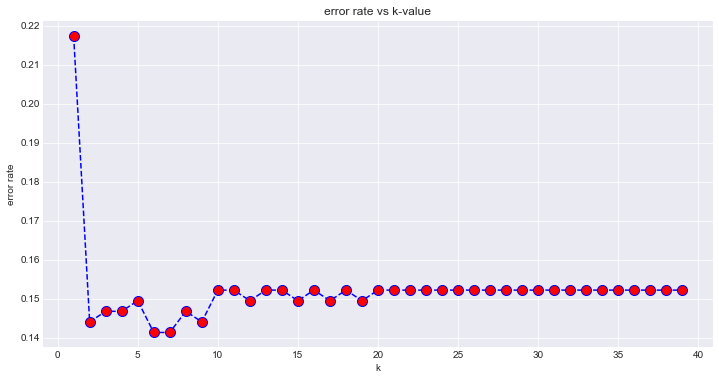

In [42]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title("error rate vs k-value")
plt.xlabel('k')
plt.ylabel('error rate')

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [44]:
y_pred=knn.predict(x_test)

In [45]:
print_score(knn,x_train,y_train,x_test,y_test,train=True)
print_score(knn,x_train,y_train,x_test,y_test,train=False)


Train Result:
------------
accuracy score: 0.8639

Classification Report: 
              precision    recall  f1-score   support

          0       0.87      0.99      0.92       922
          1       0.83      0.21      0.34       180

avg / total       0.86      0.86      0.83      1102


Confusion Matrix: 
 [[914   8]
 [142  38]]

Average Accuracy: 	 0.8421
Accuracy SD: 		 0.0187
---------------------------------------------------------------------------------------------
Test Result:
-----------
accuracy score: 0.8587

Classification Report: 
              precision    recall  f1-score   support

          0       0.86      0.99      0.92       311
          1       0.73      0.14      0.24        57

avg / total       0.84      0.86      0.82       368


Confusion Matrix: 
 [[308   3]
 [ 49   8]]

---------------------------------------------------------------------------------------------


##### so,our model has achieved 84.57% accuracy in training set after applying k-fold cross validation and 85.87% accuracy in test set

#        

# RANDOMFOREST

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf=RandomForestClassifier(n_estimators=10,criterion='entropy')

In [48]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
y_pred=rf.predict(x_test)

In [50]:
print_score(rf,x_train,y_train,x_test,y_test,train=True)
print_score(rf,x_train,y_train,x_test,y_test,train=False)


Train Result:
------------
accuracy score: 0.9809

Classification Report: 
              precision    recall  f1-score   support

          0       0.98      1.00      0.99       922
          1       1.00      0.88      0.94       180

avg / total       0.98      0.98      0.98      1102


Confusion Matrix: 
 [[922   0]
 [ 21 159]]

Average Accuracy: 	 0.8521
Accuracy SD: 		 0.0118
---------------------------------------------------------------------------------------------
Test Result:
-----------
accuracy score: 0.8668

Classification Report: 
              precision    recall  f1-score   support

          0       0.86      1.00      0.93       311
          1       1.00      0.14      0.25        57

avg / total       0.88      0.87      0.82       368


Confusion Matrix: 
 [[311   0]
 [ 49   8]]

---------------------------------------------------------------------------------------------


##### so,our model has achieved 85% accuracy in training set after applying k-fold cross validation and 86.68% accuracy in test set

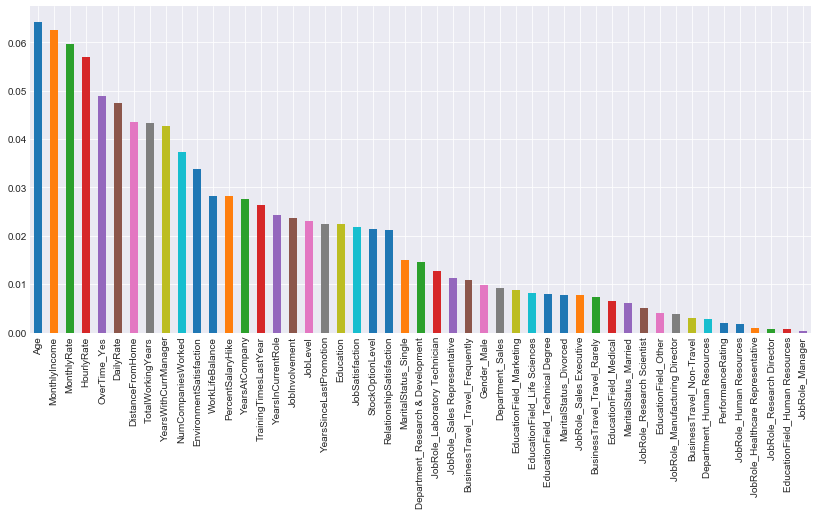

In [51]:
pd.Series(rf.feature_importances_, 
         index=x.columns).sort_values(ascending=False).plot(kind='bar', figsize=(14,6));

###### According to Random forest classifier the most important feature for predicting the result is Monthly Income and the least important feature is EducationalField_Human Resource

#    

# SVM

In [54]:
from sklearn.svm import SVC
model=SVC()


In [55]:
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [56]:
y_pred=model.predict(x_test)

In [57]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[299   7]
 [ 50  12]]
             precision    recall  f1-score   support

          0       0.86      0.98      0.91       306
          1       0.63      0.19      0.30        62

avg / total       0.82      0.85      0.81       368



###### applying the grid search to find the best model and best accuracy

In [58]:
from sklearn.model_selection import GridSearchCV
parameters=[{'C':[1,10,100,1000],'kernel':['linear']},
           {'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.5,0.1,0.01,0.001,0.0001]},
           ]
grid_search=GridSearchCV(estimator=model,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
grid_search=grid_search.fit(x_train,y_train)

In [59]:
best_accuracy=grid_search.best_score_

In [60]:
print(best_accuracy)

0.892921960073


In [61]:
best_param=grid_search.best_params_

In [62]:
print(best_param)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


###### so,we can easily see that our problem is a non linear problem

In [63]:
grid_search_prediction=grid_search.predict(x_test)

In [64]:
print_score(grid_search,x_train,y_train,x_test,y_test,train=True)
print_score(grid_search,x_train,y_train,x_test,y_test,train=False)


Train Result:
------------
accuracy score: 0.9192

Classification Report: 
              precision    recall  f1-score   support

          0       0.92      0.99      0.95       927
          1       0.93      0.53      0.68       175

avg / total       0.92      0.92      0.91      1102


Confusion Matrix: 
 [[920   7]
 [ 82  93]]

Average Accuracy: 	 0.8894
Accuracy SD: 		 0.0243
---------------------------------------------------------------------------------------------
Test Result:
-----------
accuracy score: 0.8668

Classification Report: 
              precision    recall  f1-score   support

          0       0.89      0.96      0.92       306
          1       0.67      0.42      0.51        62

avg / total       0.85      0.87      0.85       368


Confusion Matrix: 
 [[293  13]
 [ 36  26]]

---------------------------------------------------------------------------------------------


## So,the most accurate result is given by Random Forest Classifier.Although SVM and KNN also worked well..